## Core Homework 2 (Problem 1 - 5)
    - I will try to use markdown to keep it as organized as possible
    - Some will likely not require code

### Problem 1:
A & D are real square n x n matricies.
 - (a) Suppose A is symmetric and has n distinct e-values. Find a two term expansion of eigenvalues of the perturbed matrix A + epsilonD where D is positive definite.
 - AKA find Rayleigh-Schrodinger series for the eigenvalues

In [15]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.animation as animation
from scipy.integrate import quad
import os
import shutil
import glob
style.use('dark_background')

In [16]:
def show_outputs():
    #need a bunch of symbols here
    n, i, k = sp.symbols('n i k', integer=True)
    e = sp.symbols('varepsilon')  #perturb symbol/param
    A = sp.MatrixSymbol('A', n, n)  #square matrix
    D = sp.MatrixSymbol('D', n, n)  #square perturb matrix
    v = sp.MatrixSymbol('v', n, 1)  #evector
    lam = sp.symbols('lambda', cls=sp.Function)  #perturbed eval funct
    lam_0 = sp.symbols('lambda_0')  # unperturbed eval

    #expansion i show in step 1
    lam_exp = lam_0 + e * sp.Symbol('lambda_1') + e**2 * sp.Symbol('lambda_2') + sp.O(e**3)
    print_eq1 = sp.Eq(A + e * D, lam_exp)
    

    #apply eigenval equation
    eig_eq = sp.Eq((A + e * D) * v, lam_exp * v)
    display(eig_eq)

    #1st order correctg
    lambda_1 = sp.Symbol('lambda_1')
    first_order = sp.Eq(lambda_1, (v.T * D * v)[0,0])
    display(first_order)

    #2nd order correct
    lambda_2 = sp.Symbol('lambda_2')
    sum_expr = sp.Sum(((v.T * D * sp.MatrixSymbol(f'v_k', n, 1)) * (sp.MatrixSymbol(f'v_k', n, 1).T * D * v))[0,0] / (lam_0 - sp.Symbol(f'lambda_k')), (k, 1, n))
    second_order = sp.Eq(lambda_2, sum_expr)
    display(second_order)


show_outputs()


Eq((varepsilon*D + A)*v, (lambda_2*varepsilon**2 + lambda_1*varepsilon + lambda_0 + O(varepsilon**3))*v)

Eq(lambda_1, Sum(D[_i_1, _i_2]*v[_i_1, 0]*v[_i_2, 0], (_i_1, 0, n - 1), (_i_2, 0, n - 1)))

Eq(lambda_2, Sum(Sum(D[_i_1, _i_2]*D[_i_4, _i_5]*v[_i_1, 0]*v[_i_5, 0]*v_k[_i_2, _i_3]*v_k[_i_4, _i_3], (_i_1, 0, n - 1), (_i_2, 0, n - 1), (_i_3, 0, 0), (_i_4, 0, n - 1), (_i_5, 0, n - 1))/(lambda_0 - lambda_k), (k, 1, n)))

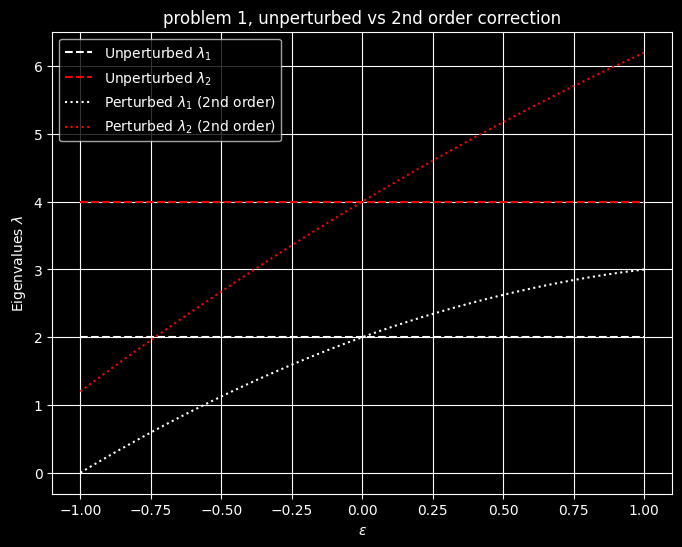

In [17]:
#unperturbed evalues from a arbitrary
lambda_0_1 = 2
lambda_0_2 = 4

#arbitrary 1st and 22nd order correction
#from here to read up: https://physics.stackexchange.com/questions/349255/second-order-perturbation-theory
lambda_1_1 = 1.5
lambda_1_2 = 2.5

lambda_2_1 = -0.5
lambda_2_2 = -0.3

#range of ep.
epsilon_values = np.linspace(-1, 1, 100)

#evector and evalues w/ found expansion from hw
perturbed_1 = lambda_0_1 + epsilon_values * lambda_1_1 + epsilon_values**2 * lambda_2_1
perturbed_2 = lambda_0_2 + epsilon_values * lambda_1_2 + epsilon_values**2 * lambda_2_2

#we can diagnoalize for exact evals, easy peasy
A = np.array([[3, 1], [1, 2]])
D = np.array([[2, 0], [0, 1]])
exact_eigenvalues = np.array([np.linalg.eigvalsh(A + e * D) for e in epsilon_values])


plt.figure(figsize=(8, 6))

#plot the unperterbed for 1 and 2
plt.plot(epsilon_values, [lambda_0_1] * len(epsilon_values), '--', label=r'Unperturbed $\lambda_1$', color='white')
plt.plot(epsilon_values, [lambda_0_2] * len(epsilon_values), '--', label=r'Unperturbed $\lambda_2$', color='red')

#plot corrections for 1 and 2
plt.plot(epsilon_values, perturbed_1, label=r'Perturbed $\lambda_1$ (2nd order)', linestyle='dotted', color='white')
plt.plot(epsilon_values, perturbed_2, label=r'Perturbed $\lambda_2$ (2nd order)', linestyle='dotted', color='red')

plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'Eigenvalues $\lambda$')
plt.title('problem 1, unperturbed vs 2nd order correction')
plt.legend()
plt.grid()
plt.savefig('perturbed_vs_unperturbed_correction_p1.png')
plt.show()


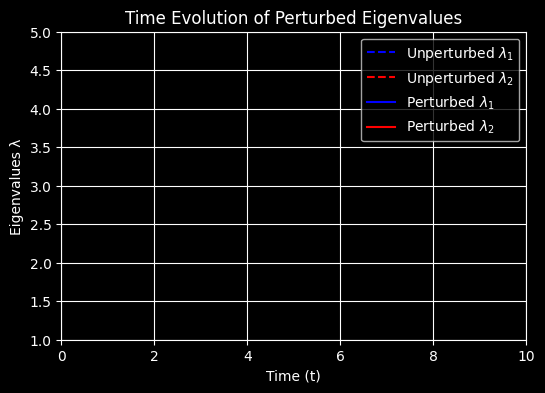

In [18]:


#time range
t_values = np.linspace(0, 10, 100)

#let epsilon vary as function of time (sin here but arbitrary) added noise
epsilon_values = 0.5 * np.sin(0.5 * t_values)#*np.random.rand()

#evalues over time
perturbed_1_t = lambda_0_1 + epsilon_values * lambda_1_1 + epsilon_values**2 * lambda_2_1
perturbed_2_t = lambda_0_2 + epsilon_values * lambda_1_2 + epsilon_values**2 * lambda_2_2

#fig ax call
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(0, 10)
ax.set_ylim(1, 5)
ax.set_xlabel('Time (t)')
ax.set_ylabel('Eigenvalues λ')
ax.grid(True)
ax.set_title('Time Evolution of Perturbed Eigenvalues')

#lines need four
line1, = ax.plot([], [], 'b--', label=r'Unperturbed $\lambda_1$')
line2, = ax.plot([], [], 'r--', label=r'Unperturbed $\lambda_2$')
line3, = ax.plot([], [], 'b', label=r'Perturbed $\lambda_1$')
line4, = ax.plot([], [], 'r', label=r'Perturbed $\lambda_2$')

ax.legend()

#ani funct
def update(frame):
    t_slice = t_values[:frame]  # Up to the current time step
    line1.set_data(t_slice, [lambda_0_1] * len(t_slice))
    line2.set_data(t_slice, [lambda_0_2] * len(t_slice))
    line3.set_data(t_slice, perturbed_1_t[:frame])
    line4.set_data(t_slice, perturbed_2_t[:frame])
    return line1, line2, line3, line4

#call ani
ani = animation.FuncAnimation(fig, update, frames=len(t_values), interval=50)

#save
gif_path = "perturbation_evolution.gif"
ani.save(gif_path, writer='pillow', fps=20)

### Problem 2

In [19]:
#symbolss
n, hbar, omega, q, E, m = sp.symbols('n hbar omega q E m', real=True, positive=True)

#orginal energy levels
E_n0 = hbar * omega * (n + sp.Rational(1/2))
print('OG energy level = ')
display(E_n0)


#first order shift
E_n1 = 0  #we know <n|x|n> = 0
print('1st energy level is zero:')
display(E_n1)

#2nd order shift
E_n2 = - (q**2 * E**2) / (2 * m * omega**2)
print('2nd energy level:')
display(E_n2)

#thrm. result
E_n_perturb = E_n0 + E_n1 + E_n2
print('thm result:')
display(E_n_perturb)

#exact solution
E_n_exact = hbar * omega * (n + 1/2) - (q**2 * E**2) / (2 * m * omega**2)
print('exact result')
display(E_n_exact)

#check and display equality
verification = sp.simplify(E_n_perturb - E_n_exact) == 0
display(verification)

OG energy level = 


hbar*omega*(n + 1/2)

1st energy level is zero:


0

2nd energy level:


-E**2*q**2/(2*m*omega**2)

thm result:


-E**2*q**2/(2*m*omega**2) + hbar*omega*(n + 1/2)

exact result


-E**2*q**2/(2*m*omega**2) + hbar*omega*(n + 0.5)

True

## Problem 3:
- asking to study logarithmic perturbation expansions from Imbo & Sukhatme, 1984



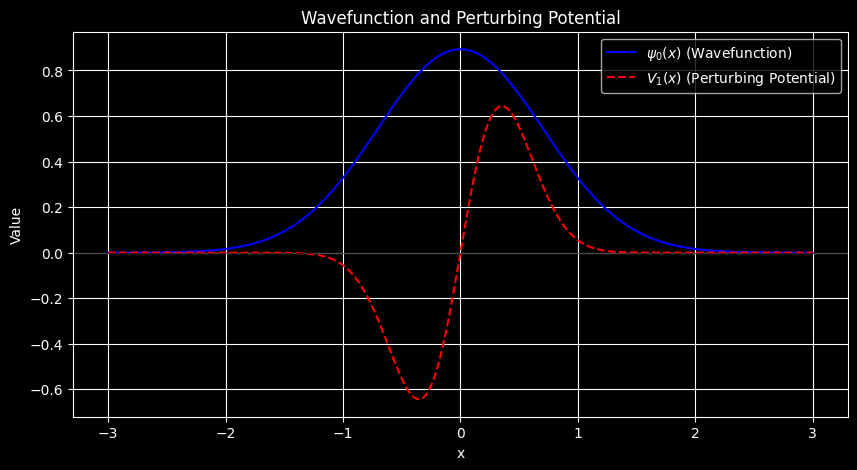

-0.4472135954999579 -0.4472135954999579


In [20]:


lambda_val = 2
alpha_val = 3
gamma_val = 4

def psi0_num(x, lambda_):
    return (lambda_ / np.pi)**(1/4) * np.exp(-lambda_ * x**2 / 2)

def V1_num(x, alpha, gamma):
    return alpha * x * np.exp(-gamma * x**2)

def E1_integrand(x, lambda_, alpha, gamma):
    return V1_num(x, alpha, gamma) * psi0_num(x, lambda_)**2

E1_num, _ = quad(E1_integrand, -np.inf, np.inf, args=(lambda_val, alpha_val, gamma_val))
E2_num = - (1/4) * (E1_num + lambda_val)**2 * (lambda_val / (lambda_val + 2 * gamma_val))**(1/2)

x_vals = np.linspace(-3, 3, 400)
psi0_values = psi0_num(x_vals, lambda_val)
V1_values = V1_num(x_vals, alpha_val, gamma_val)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, psi0_values, label=r'$\psi_0(x)$ (Wavefunction)', color='blue')
plt.plot(x_vals, V1_values, label=r'$V_1(x)$ (Perturbing Potential)', color='red', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Wavefunction and Perturbing Potential')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()
plt.savefig('problem_3_wave_log_with_perturb.png')
plt.show()

correct_E1 = 0
correct_E2 = - (1/4) * (lambda_val ** 2) * (lambda_val / (lambda_val + 2 * gamma_val))**(1/2)

print(E2_num, correct_E2)


In [21]:

#file moving for housekeeping
def move_plots():
    output_dir = 'graphs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    #all gif and png
    files_to_move = glob.glob('*.png') + glob.glob('*.gif')

    for file in files_to_move:
        destination = os.path.join(output_dir, file)

        #if exists, replace
        if os.path.exists(destination):
            os.remove(destination)

        #move it
        shutil.move(file, destination)
        print(f'Moved {file} to {output_dir}')

#housekeeping for plts  
move_plots()

Moved perturbed_vs_unperturbed_correction_p1.png to graphs
Moved problem_3_wave_log_with_perturb.png to graphs
Moved perturbation_evolution.gif to graphs
